## 🥇 Introduction 

Though women are prominent stars in this year's Olympics, female athletes have historically been marginalized at the games and have faced challenges competing on equal footing.  The founder of the modern Olympics [said](https://www.sbs.com.au/topics/zela/article/2016/05/03/women-olympic-games-uninteresting-unaesthetic-incorrect) participation by women would be "impractical, uninteresting, unaesthetic, and incorrect."  Women athletes and activists have had a long fight for recognition and inclusion and still face [substantial barriers](https://www.nytimes.com/2021/07/22/sports/olympics/olympics-athletes-gender.html). Women were only eligible to compete in all sports beginning in 2012 and there are still more medals available to men than women.

However (and because of the efforts of pioneering and persistent women), female athletes are more represented than ever in Olympic competition. At the Tokyo games, [49 percent](https://www.nytimes.com/2021/07/22/sports/olympics/olympics-athletes-gender.html) of the 11,000 athletes are women, the closest the Olympics have [ever](https://www.pri.org/stories/2016-08-17/see-120-years-struggle-gender-equality-olympics) been to equal gender representation.

As a global competition, the Olympics reveal disparities in women's access to sports and the support countries put behind women's teams. Observing teams enter at the opening ceremony or medal matches of various sports, it seems more countries field competitive men's teams than women's teams. 

I wanted to test if, in fact, more countries back competitive men than women; see if this is changing over time; and see which countries have more and less gender-equal sports programs. Additionally, I want to see how support for women athletes correlates to each country's overall gender equality.

Specifically, I will answer:

- Are more countries competitive in men's programs than women's? That is, is the range of countries represented by male medalists broader than those represented by female medalists?
- If there is a gender gap, how has it changed over time? Are a wider range of countries now fielding competitive female athletes than in the past?
- Which countries' women athletes win a large portion of the country's medals? For which countries do men get most of the medals?
- Which sports have a broad field of female competitors from many countries?
- Does the portion of medals won by female athletes relate to a country's overall gender equality?


If there are countries backing competitive men, but not women, then it suggests there are potential star female athletes from these countries who are missing from Olympic competition.

#### load athletes data


I use a database of all Olympic athletes.

The data were collected by [Sports Reference](https://www.sports-reference.com), an independent company that aggregates sports data, makes some available for sale, and (yay!) makes most of their data [freely available for use](https://www.sports-reference.com/termsofuse.html). Unfortunately, Sports Reference has shut down its Olympics data page and the data are no longer available there.

[Randi Griffin](https://www.randigriffin.com/index.html) scraped the data from Sports Reference (in 2016, when it was available) and parsed and organized it into a neat dataset published for free reuse on [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). I am very appreciative of the data processing that makes this dataset easy to use. 


Thanks to some manual inpection and adjustment by Randi Griffin (noted in her code), this dataset has 100% complete gender identifiers for each of the 134,000 athletes.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)


import seaborn as sns
sns.set_style("white")


In [2]:
athletes = pd.read_csv('athlete_events.csv')

#### inspect the data

- Double-check that data types are correct
- Check that necessary fieds are complete (not NaN)

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


_wow tug-of-war was a sport!_

In [4]:
athletes.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [5]:
athletes.rename(columns={'ID':'Athlete ID'}, inplace=True) 
#for clarity. 'ID' field is the individual athlete ID

In [6]:
athletes.isna().any()

# check which coolumns have missing data


Athlete ID    False
Name          False
Sex           False
Age            True
Height         True
Weight         True
Team          False
NOC           False
Games         False
Year          False
Season        False
City          False
Sport         False
Event         False
Medal          True
dtype: bool

there is some missing data, but not in 'Team','NOC','Year','Sport', and 'Event', which I need. There _are_ missing 'Medal' values, for athletes who competed but did not win a medal

#### load Tokyo and Pyeongyang Olympics medal counts

The dataset above only includes data through the 2016 Olympics

Sports Reference has closed their Olympics data site so that data is not available or updated.

But similar data is now hosted on [Olympedia](http://www.olympedia.org/statistics/medal/country), and available for [public use](https://olympstats.com/2020/05/27/olympedia-now-open-to-the-public/) thanks to the data collection and organizing work by a group of [Olympic historians](http://www.olympedia.org/static/about).

to get 2018 data, I will copy online data tables of medals by country by gender and read that in to a dataframe using pandas read_clipboard.

Tokyo 2020 medals counts are posted on the games' [offical page](https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medal-standings.htm).

I will also copy these data tables (once the final medals are awarded) and read this in to a dataframe.


These summary tables do not have the detail of the primary dataset (they do not list individual athletes and are not subdivided by sport or event). But the medal counts by country and gender are sufficient for my initial analyses. 

these data were copied from http://www.olympedia.org/statistics/medal/country and saved as a csv text file

In [7]:
female_2018 = pd.read_csv('2018 female.csv')

In [8]:
female_2018['Sex'] = 'F' # add 'Sex' field to align with other data

In [9]:
male_2018 = pd.read_csv('2018 male.csv')

In [10]:
male_2018['Sex'] = 'M' # add 'Sex' field to align with other data

In [11]:
medal_count_2018 = pd.concat([female_2018, male_2018]) # combine M and F into single table

In [12]:
medal_count_2018 = medal_count_2018.drop(['Country name', 'Gold', 'Silver', 'Bronze'], axis=1).rename(columns={'Total':'Medal count'}) 

# drop unneeded columns and rename 'total' for clarity

In [13]:
medal_count_2018['Year'] = 2018
medal_count_2018['Season'] = 'Winter' 

# add year and season labels (nec. when joined with rest of data)

now 2020 data

_I copied medal counts for men and women from the Tokyo Olympics offical [page](https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medal-standings.htm) count into Excel, removed all but the country name and total medals, and saved men's and women's counts as csv files_

In [14]:
female_2020 = pd.read_csv('2020 female.csv')

In [15]:
female_2020['Sex'] = 'F' # add 'Sex' field to align with other data

In [16]:
male_2020 = pd.read_csv('2020 male.csv')

In [17]:
male_2020['Sex'] = 'M' # add 'Sex' field to align with other data

In [18]:
medal_count_2020 = pd.concat([female_2020, male_2020], ignore_index=True) 

# combine M and F into single table

In [19]:
medal_count_2020['Year'] = 2020
medal_count_2020['Season'] = 'Summer' 

# add year and season labels (nec. when joined with rest of data)

_the 2020 data source doesn't have NOC country codes, so I need to match the NOC codes to the country names supplied_

_first, check what names will not match_

In [20]:
medal_count_2020.loc[~medal_count_2020['Country'].isin(athletes['Team'])]

# filter for countries where the country name listed for 2020 medals is not in the list of country names from the previous data

,Country,Total medals,Sex,Year,Season
4,ROC,32,F,2020,Summer
16,Republic of Korea,8,F,2020,Summer
49,"Hong Kong, China",5,F,2020,Summer
55,Dominican Rep.,2,F,2020,Summer
72,Côte d'Ivoire,1,F,2020,Summer
77,ROC,35,M,2020,Summer
88,Islamic Rep. of Iran,7,M,2020,Summer
89,Republic of Korea,11,M,2020,Summer
120,"Hong Kong, China",1,M,2020,Summer
133,Dominican Rep.,2,M,2020,Summer


In [21]:
medal_count_2020['Country'][~medal_count_2020['Country'].isin(athletes['Team'])].unique().tolist() 

# search whether the 2020 country name is in the athletes data country name field ('Team'). invert that selection and use that to filter the 2020 country names. print as a list. will use that to write a substitution dict.

['ROC',
 'Republic of Korea',
 'Hong Kong, China',
 'Dominican Rep.',
 "Côte d'Ivoire",
 'Islamic Rep. of Iran',
 'North Macedonia',
 'Rep. of Moldova',
 'Syrian Arab Rep.']

In [22]:
country_name_substitutions_2020 = {
 'ROC':'Russia',
 'Republic of Korea':'South Korea',
 'Hong Kong, China':'Hong Kong, China',
 'Dominican Rep.':'Dominican Republic',
 "Côte d'Ivoire":'Ivory Coast',
 'Islamic Rep. of Iran':'Iran',
 'Rep. of Moldova':'Moldova',
 'Syrian Arab Rep.':'Syria'
}

# write this substitution dict by maunally looking up these countries in athletes dataset

In [23]:
medal_count_2020['Country'].replace(to_replace=country_name_substitutions_2020, inplace=True) 

# replace non-matching names with corrected matching names

_now I need join in the NOC codes_

_I found a list on [Wikipedia](https://en.wikipedia.org/wiki/List_of_IOC_country_codes) of NOC codes and corresponding Olympic Committee names. I copied this into Excel, cleaned it up, and saved it as a csv_

In [24]:
NOC_codes = pd.read_csv('country NOC codes.csv')

In [25]:
medal_count_2020['Country'].isin(NOC_codes['Country name']).any()

# check again for un-matched names. True = all match

True

In [26]:
medal_count_2020 = medal_count_2020.merge(NOC_codes, left_on='Country', right_on='Country name').drop('Country name', axis=1)

# merge NOC codes to 2020 medal counts

In [27]:
athletes['Team'].replace(to_replace={'Macedonia':'North Macedonia'}, inplace=True)

# in cleaning the data I also found I need to update North Macedonia's name in the older data

_data is loaded!_

### Are more countries fielding competitive men than women?

#### Find the number of countries with men and women meadlists at each Olympics.

- filter the athletes data to only include medal-winners
- group the data by Year, Season, and Sex; select the country code column (NOC), and count the unique countries
- reshape the 2018 and 2020 counts to match. Concat the data together to a combines list of the count of medalling countries for each Olympics by gender



In [28]:
md = athletes.loc[athletes['Medal'].notna()] # md = only medal winners

In [29]:
countries_winning_medals = md.groupby(['Year', 'Season', 'Sex'])[['NOC']].nunique().rename(columns={'NOC':'countries winning medals'})

In [30]:
countries_winning_medals_2018 = medal_count_2018.groupby(['Year','Season','Sex'])[['NOC']].nunique().rename(columns={'NOC':'countries winning medals'}) 
countries_winning_medals_2020 = medal_count_2020.groupby(['Year','Season','Sex'])[['NOC']].nunique().rename(columns={'NOC':'countries winning medals'})

# arrange 2018 and 2020 data in the dame format

In [31]:
countries_winning_medals = pd.concat([countries_winning_medals, countries_winning_medals_2018, countries_winning_medals_2020])

In [32]:
countries_winning_medals

countries winning medals
Year Season Sex                          
1896 Summer M                          10
1900 Summer F                           5
            M                          24
1904 Summer F                           1
            M                          12
...                                   ...
2016 Summer M                          76
2018 Winter F                          22
            M                          24
2020 Summer F                          73
            M                          80

[105 rows x 1 columns]

#### visualize the range of countries represented by men and women medalists:

graph paired bar charts with year/season as the x-axis and counts of countries represented by men and women, paired, on the y-axis. 

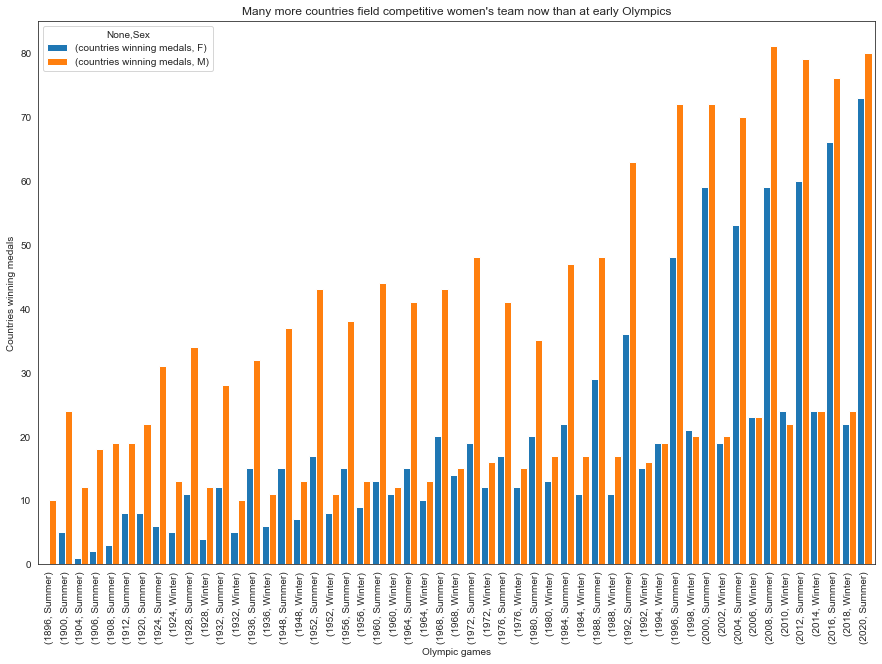

In [33]:
countries_winning_medals.unstack().plot(kind='bar', width=0.9)

plt.xlabel('Olympic games')
plt.ylabel('Countries winning medals')


plt.title("Many more countries field competitive women's team now than at early Olympics")
# give it a title explaining the main conclusion


plt.show()

The number of countries fielding competitive women athletes (show by the blue bars) is steadily increasing. Some of this is explained by the fact that there are more Olympic events open to women (explored further below) and some is likely due to the fact that more societies have become more supportive of women's sports over the past 125 years.

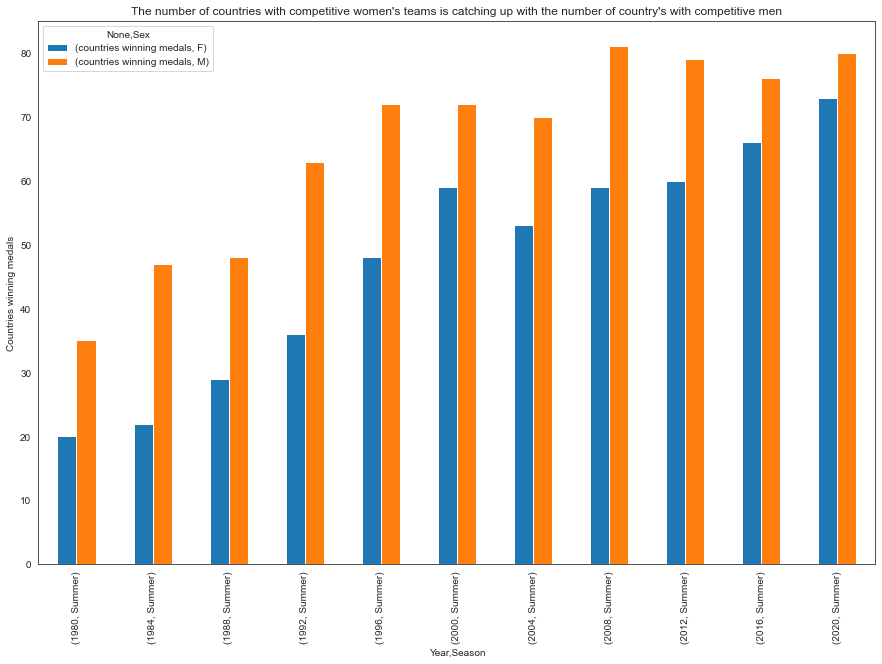

In [34]:
countries_winning_medals.loc[(slice(1980,2020),'Summer'),].unstack().plot(kind='bar')

# select just the summer games since 1980 (for easier visual comparison)

plt.ylabel('Countries winning medals')
plt.title("The number of countries with competitive women's teams is catching up with the number of country's with competitive men")

plt.show()

Zooming in on Summer games from the past 40 years shows the number of countries with competitive women athletes has more than tripled in that time. 

Though the gap is closing, there are still fewer countris winning women's medals than men's (suggesting fewer countries support women athletes).

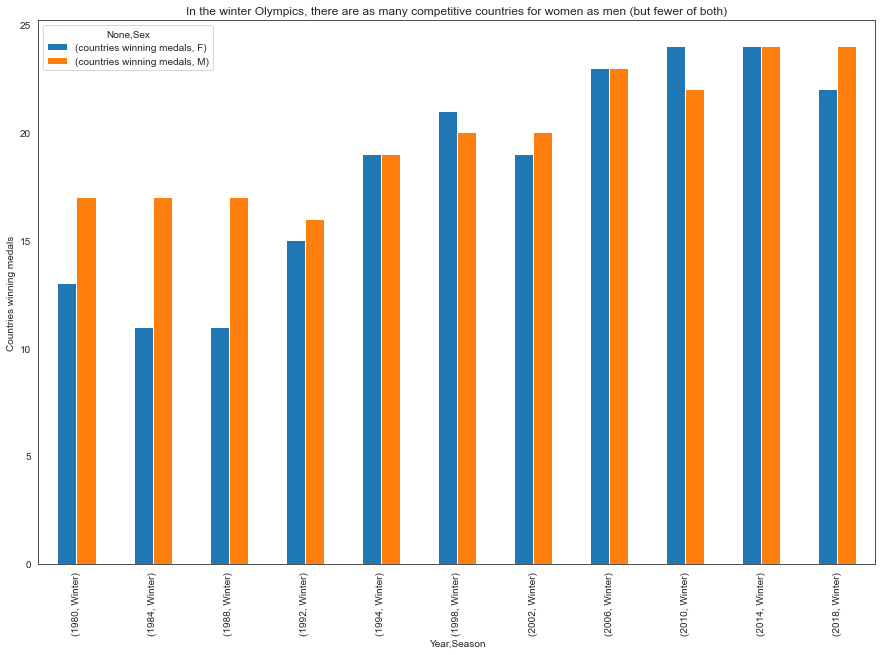

In [35]:
countries_winning_medals.loc[(slice(1980,2020),'Winter'),].unstack().plot(kind='bar')

# select only winter games, for contrast

plt.ylabel('Countries winning medals')
plt.title("In the winter Olympics, there are as many competitive countries for women as men (but fewer of both)")

plt.show()

At the winter Olympics, which has fewer events and fewer competitive countries overall, the gap has closed and as many countries have competitive women as men.

### Are a few countries dominant in women's sports?

#### calculate and graph the distibution of medals by country for men and women

count the number of event medals won by each country, in each Olympics, by men and by women

- group the medalists data by Year, Season (so I can further split the data by time), Country (NOC), Sex, Event and Medal (so each row is a unique medal
- count those medals once each (to avoid overcounting team events where multiple athletes win medals for a single event)
- reshape/unstack these counts to a table with year/season and country as the index, 'F' and 'M' as columns, and medal counts as values
- reshape the 2018 and 2020 counts to match then concat together   

In [36]:
medal_event_medalist_counts = md.groupby(['Year','Season','NOC','Sex','Event','Medal'])[['Name']].count()
medal_event_medalist_counts

# group the data by year, country, sex, event and medal; select Name as generic counter. 

Name
Year Season NOC Sex Event                                 Medal       
1896 Summer AUS M   Athletics Men's 1,500 metres          Gold       1
                    Athletics Men's 800 metres            Gold       1
                    Tennis Men's Doubles                  Bronze     1
            AUT M   Cycling Men's 10,000 metres           Bronze     1
                    Cycling Men's 12-Hours Race           Gold       1
...                                                                ...
2016 Summer VEN F   Athletics Women's Triple Jump         Silver     1
                    Cycling Women's BMX                   Bronze     1
                M   Boxing Men's Flyweight                Bronze     1
            VIE M   Shooting Men's Air Pistol, 10 metres  Gold       1
                    Shooting Men's Free Pistol, 50 metres Silver     1

[19146 rows x 1 columns]

In [37]:
medal_event_medalist_counts['Medal count'] = medal_event_medalist_counts['Name'].notna().astype(int)

# create a medal count column where each medal is counted only once. take every row with a count at all (1 or more) (with notna(); store that as int so True becomes 1

In [38]:
medal_count = medal_event_medalist_counts.groupby(['Year','Season','NOC','Sex'])[['Medal count']].sum()
medal_count

# group again by year, season, country, and sex. sum the reduced medal counts

Medal count
Year Season NOC Sex             
1896 Summer AUS M              3
            AUT M              5
            DEN M              6
            FRA M             11
            GBR M              9
...                          ...
2016 Summer USA M             60
            UZB M             13
            VEN F              2
                M              1
            VIE M              2

[2513 rows x 1 columns]

In [39]:
medal_count = pd.concat([medal_count, medal_count_2018.groupby(['Year','Season','NOC','Sex'])[['Medal count']].sum(), medal_count_2020.groupby(['Year','Season','NOC','Sex'])[['Total medals']].sum().rename(columns={'Total medals':'Medal count'})]) 

# concat the rest of the medal counts with 2018 and 2020, after subtotalling the 2020 and 2018 data (and renaming the total column in 2020)

In [40]:
medal_count['Medal count'].isna().any()

# check if any counts are missing / NaNs (somehow), before summing. False = no missing data

False

In [41]:
medal_count.unstack().fillna(0)

# and here is the medals table by sex

Medal count      
Sex                       F     M
Year Season NOC                  
1896 Summer AUS         0.0   3.0
            AUT         0.0   5.0
            DEN         0.0   6.0
            FRA         0.0  11.0
            GBR         0.0   9.0
...                     ...   ...
2020 Summer UGA         1.0   3.0
            UKR        11.0   7.0
            USA        66.0  41.0
            UZB         0.0   5.0
            VEN         1.0   3.0

[1778 rows x 2 columns]

#### visualize if women's sports are dominated by only a few teams:

plot the counts:

1. paired, stacked bar charts. year/season as the x axis; stacked bars, color-coded and sorted by country; paired bars for men and women. If a few countries are dominant, their colors will cover a lot of the bar
    - (maybe I need to shade just the top few countries, otherwise it might be too many colors to be legible)
2. for a recent years/seasons, paired histograms with countries on the x-axis and medals won on the y-axis, and paired bars for men and women. If male medalists represent a wider set of countries, the men's bars will have a longer, flatter tail 

<AxesSubplot:xlabel='Year,Season,Sex'>

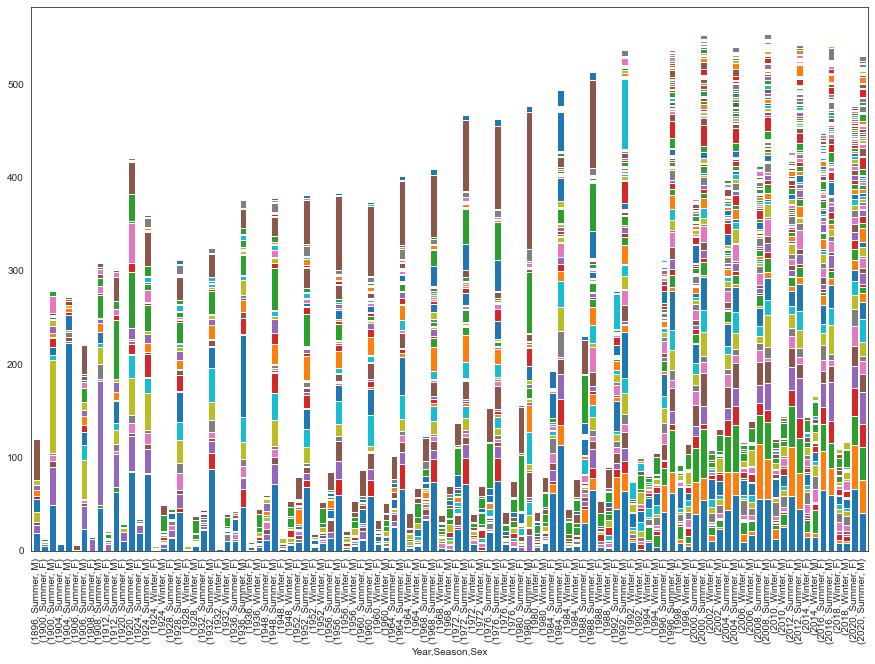

In [42]:
medal_count.unstack(2)['Medal count'].sort_values(by=(2020,'Summer','F'), axis=1, ascending=False).plot(kind='bar', stacked=True, width=0.85, legend=False)



# unstack/reshape data to a table country codes in column; drop top 'medal count' level; sort by 2020 Summer women's medal count; then plot as bar chart

Well here's what I said I wuld graph but it's rather a mess.

If you squint, you can see what I'm looking for: The wininningest countries take a larger portion of the women's medals than the men's. 

_Let's try to show that in a more legible graph_

In [44]:
medal_count_by_country = medal_count.unstack(2).sort_values(by=(2020,'Summer','F'), axis=1, ascending=False)

# # unstack/reshape data to a table country codes in column; sort by 2020 Summer women's medal count

In [45]:
colors = ['b','r','m','C4','c']

colors += ['#dedfe0'] * 3000


# this is pretty hacky, but this creates a custom colormap with colors assigned for the top 5 countries then a light grey color in the next 3000 spaces. I will pass this to 'color' in pyplot

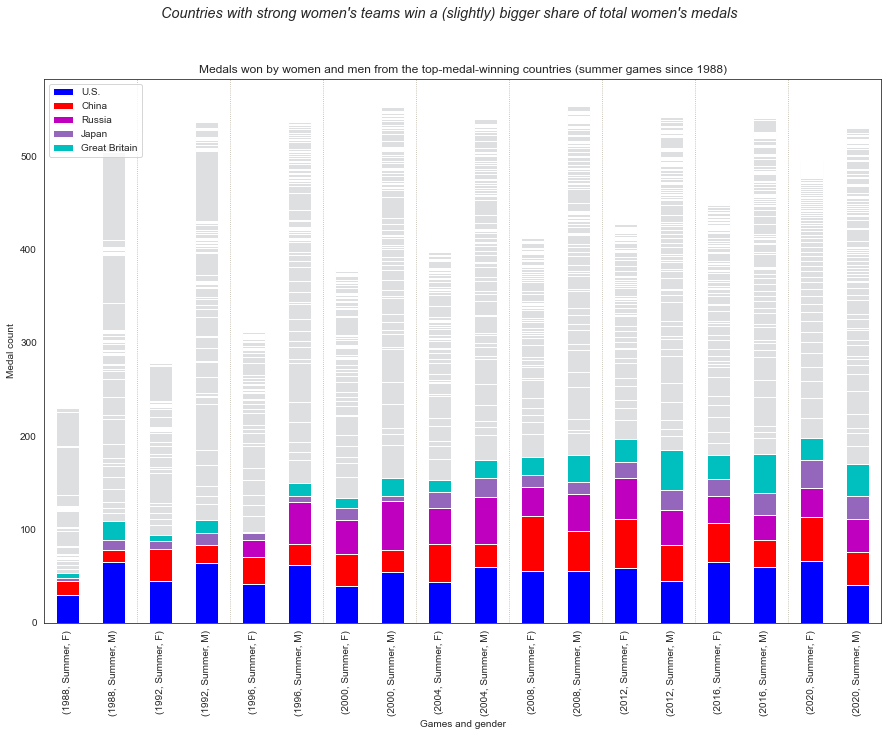

In [46]:
from matplotlib import ticker # import ticker for setting x axis

fig,ax = plt.subplots()

medal_count_by_country.loc[(slice(1988,2020),'Summer'),].plot(kind='bar', stacked=True, color=colors, legend=True, ax=ax)

# select 1988 to 2020, Summer games; plot as stacked bar; colors as colormap defined above

plt.ylabel('Medal count')
plt.xlabel('Games and gender')
plt.legend(['U.S.', 'China', 'Russia', 'Japan', 'Great Britain',]) # relabel legend with top-5 country names

ax.xaxis.set_minor_locator(ticker.IndexLocator(base=2, offset= 1.75)) # set minor x axis at every 2 + 1.75 (so in-between every 2 bars)
plt.grid(axis='x', which='minor', linestyle=':', color='#b3ac9b') # draw beige, dashed, x-axis (vertical) grid lines on minor ticks


plt.title('Medals won by women and men from the top-medal-winning countries (summer games since 1988)')

fig.suptitle("Countries with strong women's teams win a (slightly) bigger share of total women's medals", fontstyle='italic', fontsize='x-large')

plt.show()

_I think this is as close to the visual as I can get now. I would like to group the bars together by games but it seems that is somewhat beyond the capabilities of out-of-the-box pyplot_

The chart suggests only a slight discrepency. Games in 2016 and 2008 saw the top teams' men and women get roughly equal medals. However, in 2012 and even more this year, the top women's teams got considerably larger portions of the medals. 

This _suggests_ those top teams (especially U.S. and China) are backing the strongest women athletes, and women from these countries face less international competition because other countries do not put the same support behing women's sports.

_now let's look at the distribution of countries winning men's and women's medals_

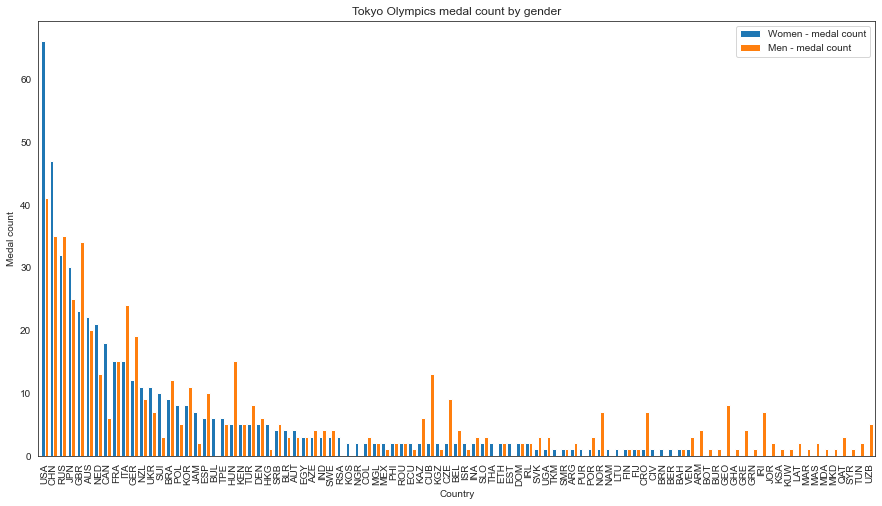

In [47]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

medal_count.loc[2020,'Summer'].unstack()['Medal count'].sort_values(by='F', ascending=False).plot(kind='bar', width=0.85, ax=ax)

# filter data to only 2020 summer games; shape to table with countries as index and 'M', 'F' as columns; sort by number of medals won by women; then plot

plt.title('Tokyo Olympics medal count by gender')
plt.xlabel('Country')
plt.ylabel('Medal count')
plt.legend(['Women - medal count', 'Men - medal count'])

plt.show()

_This is hard to parse visually. let's stack the bars on top of each other instead_

In [48]:
medal_count_2020 = medal_count_2020.set_index(['Country','Sex'])['Total medals'].unstack().sort_values(by='F', ascending=False)

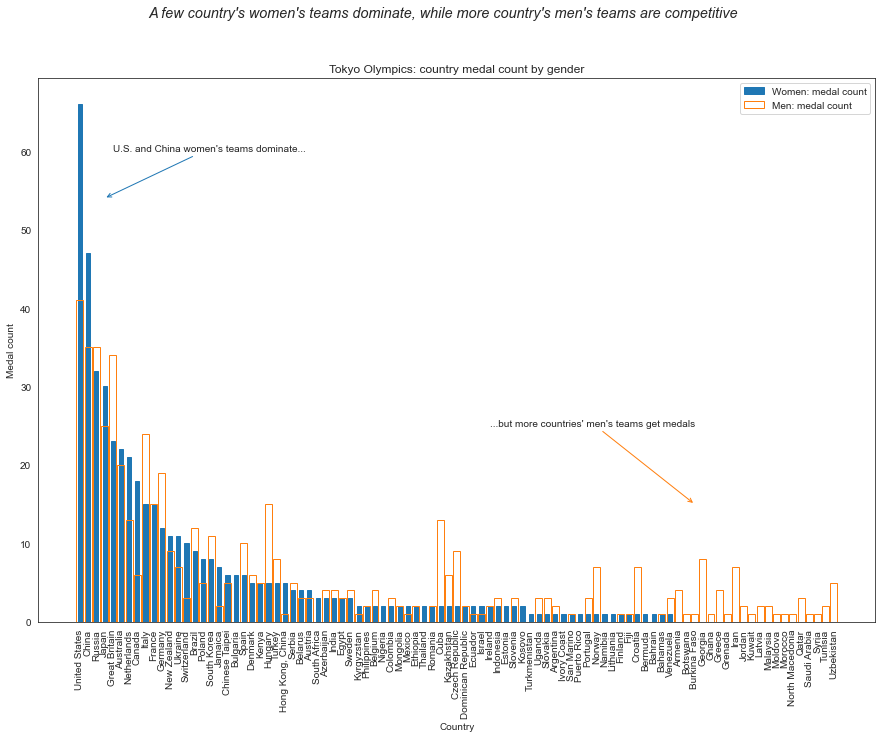

In [49]:
fig, ax = plt.subplots()

ax.bar(x=medal_count_2020.reset_index()['Country'], height=medal_count_2020['F'], width=0.5, color='C0', edgecolor='C0', label='Women: medal count')
ax.bar(x=medal_count_2020.reset_index()['Country'], height=medal_count_2020['M'], width=0.85, color='none', edgecolor='C1', label='Men: medal count')

plt.ylabel('Medal count')
plt.xlabel('Country')

plt.xticks(rotation='vertical')

plt.legend(loc='upper right')

plt.title('Tokyo Olympics: country medal count by gender')
fig.suptitle("A few country's women's teams dominate, while more country's men's teams are competitive", fontstyle='italic', fontsize='x-large')


ax.annotate(
    "U.S. and China women's teams dominate...", # add annotation labels and arrows
    (3, 54), 
    (4, 60), 
    arrowprops={'arrowstyle':'->', 'color':'C0'},
)
ax.annotate(
    "...but more countries' men's teams get medals", 
    (75, 15), 
    (50, 25), 
    arrowprops={'arrowstyle':'->', 'color':'C1'}
)

plt.show()

This shows more clearly how dominant the U.S. and China are winning women's medals. But the countries winning men's medals do taper off more gradually and have a longer tail, meaning more countries have competitive (medal-winning) men than women.

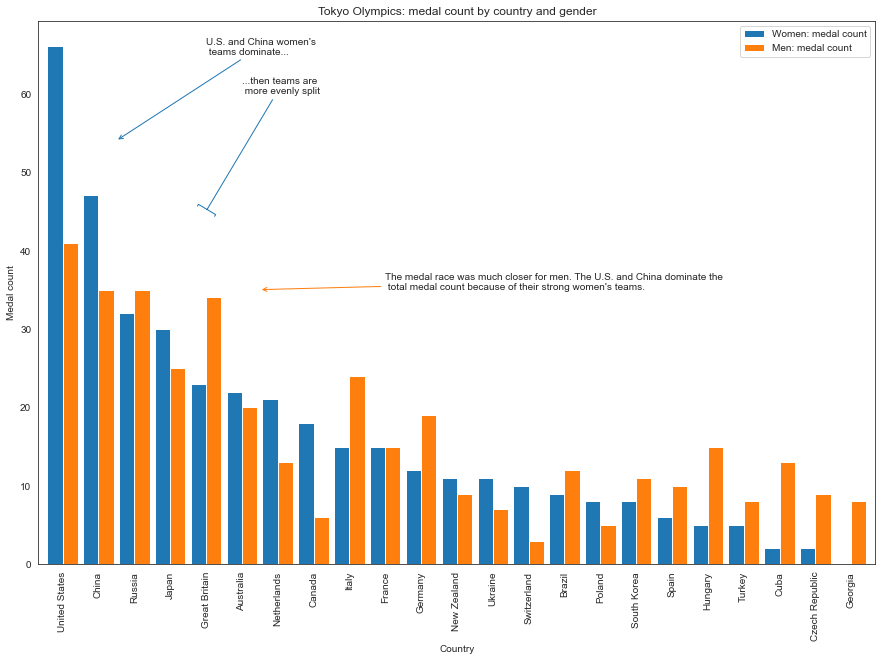

In [101]:
fig,ax = plt.subplots()

medal_count_2020.loc[(medal_count_2020['F'] >= 8) | (medal_count_2020['M'] >= 8)].plot(kind='bar', width=.85, ax=ax)

# from 2020 medal count, select only countries where men or women won at least 8 medals (to drop few-medal countries); then plot as paired bar

plt.xlabel('Country') # add axis labels
plt.ylabel('Medal count')

plt.legend(['Women: medal count', 'Men: medal count']) # add legend labels
 


ax.annotate(
    "U.S. and China women's\n teams dominate...", # add annotation labels and arrows
    (1.5, 54), 
    (4, 65), 
    arrowprops={'arrowstyle':'->', 'color':'C0'},
)
ax.annotate(
    "...then teams are\n more evenly split", 
    (4, 45), 
    (5, 60), 
    arrowprops={'arrowstyle':'-[', 'color':'C0'}
)


ax.annotate(
    "The medal race was much closer for men. The U.S. and China dominate the\n total medal count because of their strong women's teams.",
    (5.5,35),
    (9,35),
    arrowprops={'arrowstyle':'->', 'color':'C1'}
)

plt.title('Tokyo Olympics: medal count by country and gender')

plt.show()

Filtering to just countries whose men or women have won 8 or more medals makes it easier to see that after #1 U.S and #2 China, the top countries are pretty evenly split. In fact, without their dominance on the women's side, the U.S. and China would have much more competition in the overall medal race. To look at that another way, if Russia, Great Britain, or Italy could back women athletes as much as they do men, they would challenge the U.S. and China for most total medals.

_last, let's check some statistics_

In [51]:
medal_count.loc[2016].groupby('Sex').describe()

Medal count                                               
          count      mean        std  min  25%  50%  75%   max
Sex                                                           
F          66.0  6.787879  10.393067  1.0  2.0  3.0  8.0  65.0
M          76.0  7.118421  10.108699  1.0  1.0  3.0  7.0  60.0

Looking back to 2016, the men and women are closely matched, among countries who claim any medals at all. A 'typical' medal-winning country's men and women each win about 7 medals. And the variation is not that different between genders 

In [52]:
medal_count.loc[2020].groupby('Sex').describe()

Medal count                                               
          count      mean        std  min  25%  50%  75%   max
Sex                                                           
F          73.0  6.780822  10.886085  1.0  2.0  2.0  6.0  66.0
M          80.0  6.625000   8.627855  1.0  2.0  3.0  7.0  41.0

This year, the total expected number of medals for each country have fallen a bit for men and women. But the variation is considerably greater on the men's side, meaning some countries take a lot of women's medals while others take few, compared to a more even distribution among men.

This is further suggests that more countries back competitive male athletes, while comparatively fewer countries back women athletes.

### Which countries field more competitive women athletes?

#### calculate the percent of each country's medals won by women for each year/season

- reshape/pivot the medal counts by Year, Country (NOC), and Sex (from above) to index as  Year, Season, country (NOC); columns as M, F; and values as number of medals won
- calculate the percent of medals won by women

In [53]:
medal_count_with_total = medal_count.unstack()['Medal count'].fillna(0)

# rearrange data to 'F', 'M' as columns; drop a column level; replace NaNs with zeros

In [54]:
# write a function to calculate and add total and perecent female columns

def pct_calculator(df):
    df.loc[:,'total medals'] = (df['F'] + df['M'])
    df.loc[:,'pct_F'] = df['F'] / df['total medals']

In [55]:
pct_calculator(medal_count_with_total)

In [56]:
medal_count_with_total

Sex                 F     M  total medals     pct_F
Year Season NOC                                    
1896 Summer AUS   0.0   3.0           3.0  0.000000
            AUT   0.0   5.0           5.0  0.000000
            DEN   0.0   6.0           6.0  0.000000
            FRA   0.0  11.0          11.0  0.000000
            GBR   0.0   9.0           9.0  0.000000
...               ...   ...           ...       ...
2020 Summer UGA   1.0   3.0           4.0  0.250000
            UKR  11.0   7.0          18.0  0.611111
            USA  66.0  41.0         107.0  0.616822
            UZB   0.0   5.0           5.0  0.000000
            VEN   1.0   3.0           4.0  0.250000

[1778 rows x 4 columns]

#### visualize the portion of each country's medals won by women:


1. plot: all Olympics, percent of medals won by women, by country

1. plot: since 2000, total medals won vs. percent of medals won by women, by country

1. world map: percent of medals won by women


_(I dropped my proposal to map percent of medals won by women over all time. Because most early games were so skewed to men, the all-time percentages do not provide useful information about present conditions)_



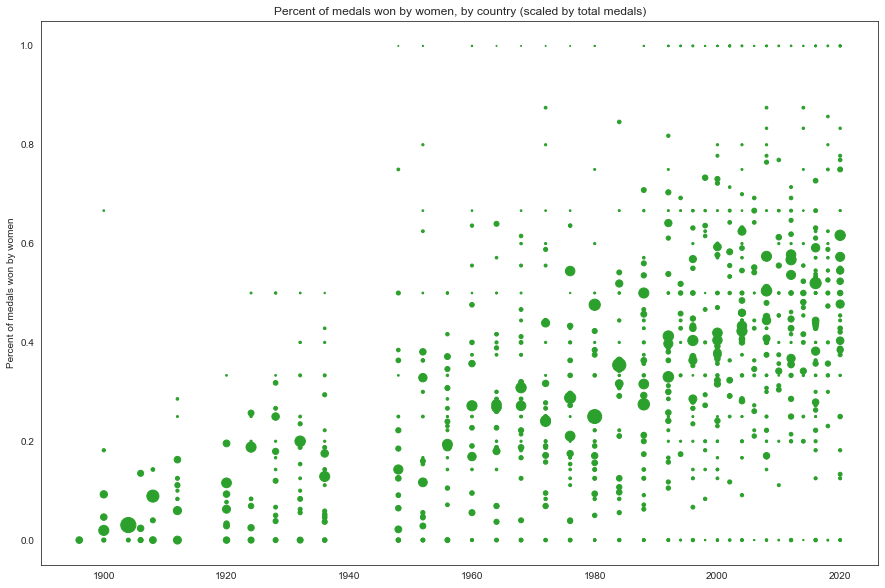

In [57]:
plt.scatter(medal_count_with_total.index.get_level_values('Year'), medal_count_with_total['pct_F'], c='C2', s=(medal_count_with_total['total medals']))

plt.ylabel('Percent of medals won by women')

plt.title('Percent of medals won by women, by country (scaled by total medals)')


plt.show()

There is a clear upward trajectory in the percent of medals won by women. As mentioned, some of that is because women have been able to compete for an increasing number of medals. 

_Let's add to the graph what percent of total medals are available to women each year_

In [58]:
total_medals_by_sex = medal_count.reset_index().groupby(['Year','Season','Sex'])['Medal count'].sum().unstack() 

# make new subtotal grouping by Year, Season, Sex, sum medal counts, unstack the data to F and M columns

In [59]:
pct_calculator(total_medals_by_sex)

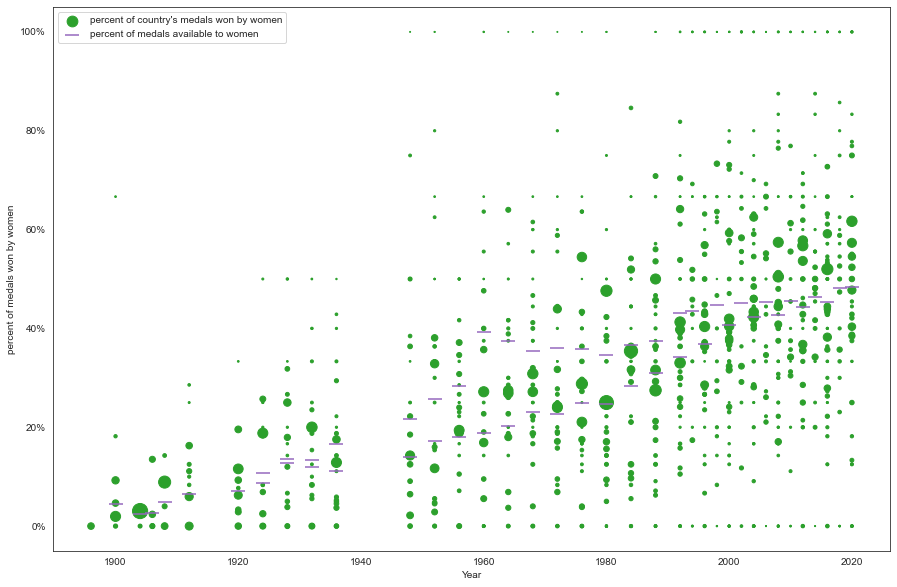

In [60]:
fig,ax=plt.subplots()

plt.scatter(medal_count_with_total.index.get_level_values('Year'), medal_count_with_total['pct_F'], s=(medal_count_with_total['total medals']), c='C2', label="percent of country's medals won by women")

# plot percent of medals won by women, sized by total medals won (x = year, y = percent won by women, size = total medals won) 


plt.scatter(total_medals_by_sex.index.get_level_values('Year'), total_medals_by_sex['pct_F'], c='C4', marker='_', s=200, label = "percent of medals available to women")

# plot percent of total medals available to women (x = year, y = percent of total medals won by women)


plt.xlabel('Year')
plt.ylabel('percent of medals won by women')
plt.legend(loc='upper left')

ax.yaxis.set_major_formatter('{x:.0%}') # reformat Y axis as percentage


plt.show()



For the countries that the most medals each year, women win approximately the same proportion as the portion of medals available to them. This year's games stand out with most countries more closely balanced near 50 percent of their medals won by women, compared to years past that seem more scattered.

In [61]:
pct_f_since_2000 = medal_count.reset_index().loc[medal_count.reset_index()['Year'] >= 2000].groupby(['NOC', 'Sex']).sum().unstack().fillna(0)['Medal count'] 

# reset index; .loc filter by year (>= 2000); re-group; sum; unstack to put F and M in columns; fill NaNs, select down a level of columns

In [62]:
pct_calculator(pct_f_since_2000)

plot total medals against percent won by women

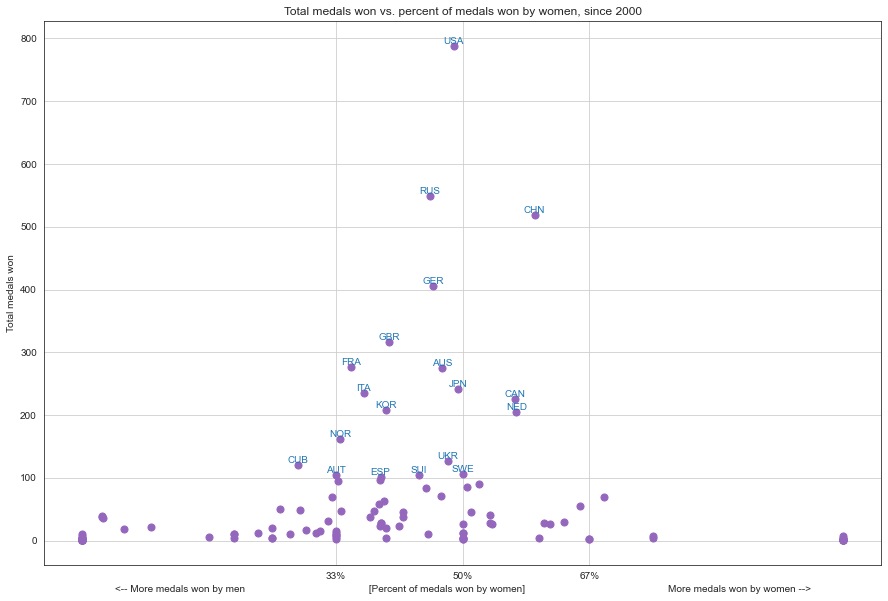

In [63]:
fig,ax=plt.subplots()

ax.scatter(pct_f_since_2000['pct_F'], pct_f_since_2000['total medals'], s=50, c='C4')


plt.title ('Total medals won vs. percent of medals won by women, since 2000')
plt.xlabel('<-- More medals won by men                                             [Percent of medals won by women]                                                    More medals won by women -->')
plt.ylabel('Total medals won')

plt.grid() # show grid
ax.xaxis.set_major_formatter('{x:.0%}') # reformat X axis as percentage
plt.xticks([1/3, 1/2, 2/3]) # set x lines at 1/3, 1/2, and 2/3



for c in pct_f_since_2000.loc[pct_f_since_2000['total medals'] > 100].index:
    plt.annotate(c, (pct_f_since_2000.loc[c,'pct_F'],pct_f_since_2000.loc[c,'total medals']), ha='center', va='bottom', c='C0')


plt.show()

The countries that win the most medals (since 2000) are all somewhat near gender parity, but still most take home more men's than women's medals. (some (France, Norway, Austria) by nearly a 2-to-1 ratio). China stands out for its medal haul earned especially by women athletes. At the bottom of the graph, many more countries have won a few medals from their men than from women. 

_now let's make a map_

download a simplified worldmap shapefile from http://thematicmapping.org/downloads/world_borders.php

In [64]:
import geopandas as gpd
import mapclassify

# this will only work in a conda environment where geopandas is installed

In [65]:
world = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0/TM_WORLD_BORDERS_SIMPL-0.3.shp')

In [66]:
# world = world.to_crs('ESRI:54030') # reproject to a cozy-looking Robinson projection # except something is wrong with this shp file that smears when I reproject

In [67]:
NOC_codes.loc[~NOC_codes['Country name'].isin(world['NAME'])]['Country name'].tolist() 

#check what NOC country names do not match the world map country names; print as a list to make a substitution dict

['Brunei',
 'Republic of the Congo',
 'Ivory Coast',
 'Federated States of Micronesia',
 'The Gambia',
 'Great Britain',
 'Hong Kong, China',
 'Iran',
 'Virgin Islands',
 'South Korea',
 'Kosovo',
 'Laos',
 'Libya',
 'Moldova',
 'North Macedonia',
 'Myanmar',
 'North Korea',
 'South Sudan',
 'São Tomé and Príncipe',
 'Eswatini',
 'Syria',
 'Tanzania',
 'East Timor',
 'Chinese Taipei',
 'Vietnam']

In [68]:
world.loc[~world['NAME'].isin(NOC_codes['Country name'])]['NAME'].tolist()

# check the converse to find the names to match

['Burma',
 'Brunei Darussalam',
 'Congo',
 'French Guiana',
 'Falkland Islands (Malvinas)',
 'Micronesia, Federated States of',
 'French Polynesia',
 'Gambia',
 'Greenland',
 'Iran (Islamic Republic of)',
 "Cote d'Ivoire",
 "Korea, Democratic People's Republic of",
 'Korea, Republic of',
 "Lao People's Democratic Republic",
 'Libyan Arab Jamahiriya',
 'Martinique',
 'Montserrat',
 'The former Yugoslav Republic of Macedonia',
 'New Caledonia',
 'Niue',
 'Anguilla',
 'Hong Kong',
 'Northern Mariana Islands',
 'Faroe Islands',
 'Gibraltar',
 'Isle of Man',
 'Macau',
 'Mayotte',
 'Åland Islands',
 'Norfolk Island',
 'Cocos (Keeling) Islands',
 'Antarctica',
 'Bouvet Island',
 'French Southern and Antarctic Lands',
 'Heard Island and McDonald Islands',
 'British Indian Ocean Territory',
 'Christmas Island',
 'United States Minor Outlying Islands',
 'Reunion',
 'Republic of Moldova',
 'Syrian Arab Republic',
 'Tokelau',
 'Sao Tome and Principe',
 'United Republic of Tanzania',
 'United Kingd

In [69]:
map_name_substitutions={
 'Brunei Darussalam':'Brunei',
 'Congo':'Republic of the Congo',
 "Cote d'Ivoire":'Ivory Coast',
 'Congo DRC':'Democratic Republic of the Congo',
 'Cabo Verde':'Cape Verde',
 'Micronesia, Federated States of':'Federated States of Micronesia',
 'Gambia':'The Gambia',
 'United Kingdom':'Great Britain',
 'Hong Kong':'Hong Kong, China',
 'United States Virgin Islands':'Virgin Islands',
 # uh oh this isn't on my map . 'Kosovo',
 'Palestinian Territory':'Palestine',
 'Russian Federation':'Russia',
 'Sao Tome and Principe':'São Tomé and Príncipe',
 'Timor-Leste':'East Timor',
 'Taiwan':'Chinese Taipei',
 'Iran (Islamic Republic of)':'Iran',
 'Korea, Republic of':'South Korea',
 "Lao People's Democratic Republic":'Laos',
 'Libyan Arab Jamahiriya':'Libya',
 'Republic of Moldova':'Moldova',
 'The former Yugoslav Republic of Macedonia':'North Macedonia',
 'Burma':'Myanmar',
 "Korea, Democratic People's Republic of":'North Korea',
 # also missing 'South Sudan',
 'Swaziland':'Eswatini',
 'Syrian Arab Republic':'Syria',
 'United Republic of Tanzania':'Tanzania',
 'Viet Nam':'Vietnam'
}

# assign replacement names from the NOC codes list to un-matched names used in the map file

In [70]:
world['NAME'].replace(to_replace=map_name_substitutions, inplace=True)

# replace names using the dict

In [71]:
world_with_NOC = world.merge(NOC_codes, left_on='NAME', right_on='Country name') 

# merge in NOC codes

In [72]:
world_with_NOC = world_with_NOC.merge(pct_f_since_2000, on='NOC')

# merge in data on percent of medals won by women

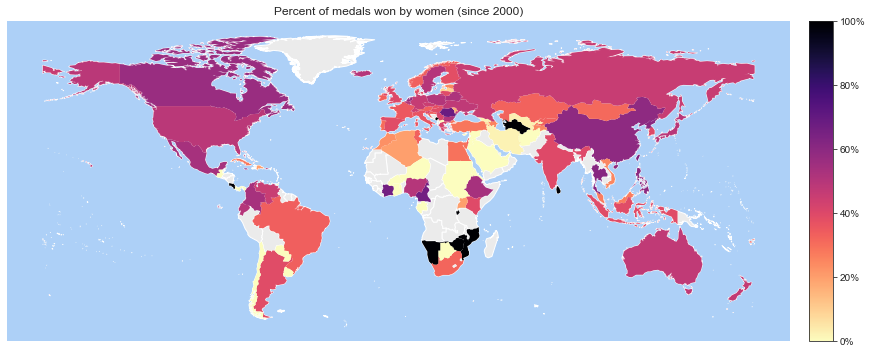

In [73]:
from mpl_toolkits.axes_grid1 import make_axes_locatable # needed to move/place colorbar legend

fig, ax=plt.subplots(1,1)

ax.set_facecolor('#add0f7') # make background blue

divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="3%", pad=0.1) # size and place colorbar

world.loc[world['NAME'] != 'Antarctica'].plot(color='#ebebeb', ax=ax) 

# plot world map (with Antarctica filtered out) as background fill for countries with no data


world_with_NOC.plot(
    column='pct_F', 
    ax=ax, 
    legend=True, cax=cax, 
    cmap='magma_r', 
    edgecolor='none'
)

# plot map with data. use 'pct_F' as column for choropleth


cax.yaxis.set_major_formatter('{x:.0%}') # display color bar labels as percentages


ax.spines.clear() # hide map border line

ax.set_xticks([]) # erase x ticks
ax.set_yticks([])


ax.set_title('Percent of medals won by women (since 2000)')

plt.show()


There are a few regional trends here: North America, eastern Europe, and east Asia show generally strong women's teams. Western Europe looks slightly skewed to men's teams. It is also apparent that some parts of the world have few medals at all.

### Which sports have competitive women from the broadest set of countries?

#### calculate number of countries represented by medalists in each sport

repeat the process above, but for sports instead of countries:

- group the medalists data by Year, Season, Sport, and Sex; select NOC (country) column, and count unique (countries winning medals)
- filter data to since 2000 (for more contemporary comparisons)
- pivot-table the data to index as Sport, columns as Sex (M, F), and values as sum of countries winning medals

(This analysis will leave out 2018 and 2020 data because I do not have data for these games divided by sport)

In [74]:
country_count_by_sport = md.groupby(['Year','Season','Sport','Sex'])[['NOC']].nunique().rename(columns={'NOC':'countries winning medals'})

# group by year, season, _sport_,  and sex; select country column and count unique countries in each index combo. rename column to descriptive 'countries winning medals'

In [76]:
country_count_by_sport_since_2000 = country_count_by_sport.loc[2000:]

In [77]:
country_count_by_sport_since_2000 = country_count_by_sport_since_2000.groupby(['Sport','Sex'])['countries winning medals'].sum().unstack()

# groupby sport and sex; take sum of countries represented; unstack to get 'F' and 'M' in columns

#### visualize which sports have a broad international field of women competitors

Plot that table as a paired bar chart

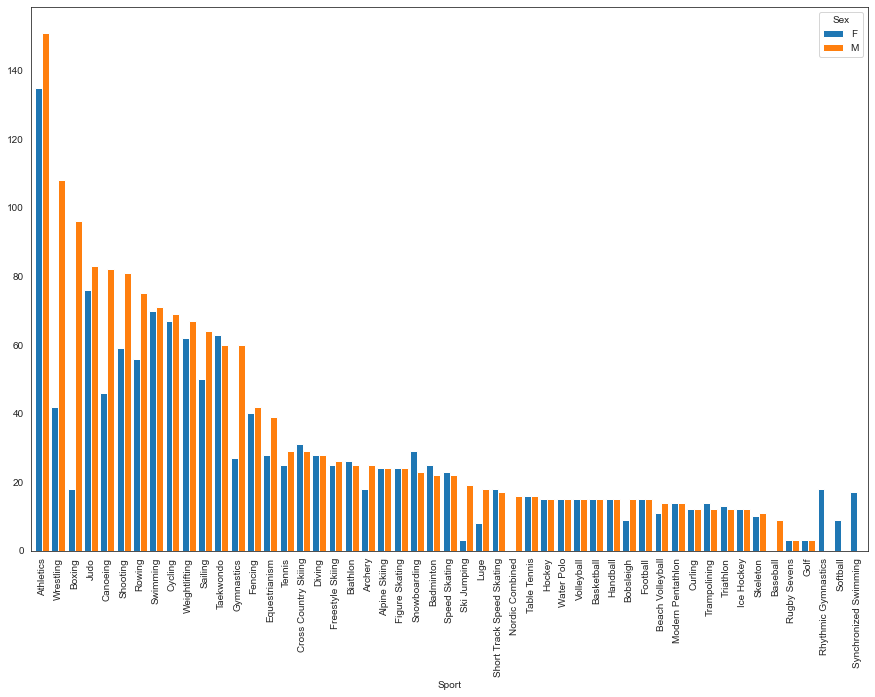

In [79]:
country_count_by_sport_since_2000.sort_values(by='M', ascending=False).plot(kind='bar', width=0.85)

plt.show()

_that's good but it would be better to sort by biggest difference between competitive countries for men and women_

In [80]:
country_count_by_sport_since_2000.fillna(0, inplace=True) # replace NaNs with zeros

In [81]:
country_count_by_sport_since_2000['diff'] = country_count_by_sport_since_2000['M'] - country_count_by_sport_since_2000['F']

# subtract to calculate the difference between competitive men's and women's countries

In [82]:
country_count_by_sport_since_2000 = country_count_by_sport_since_2000.sort_values(by='diff', ascending=False)

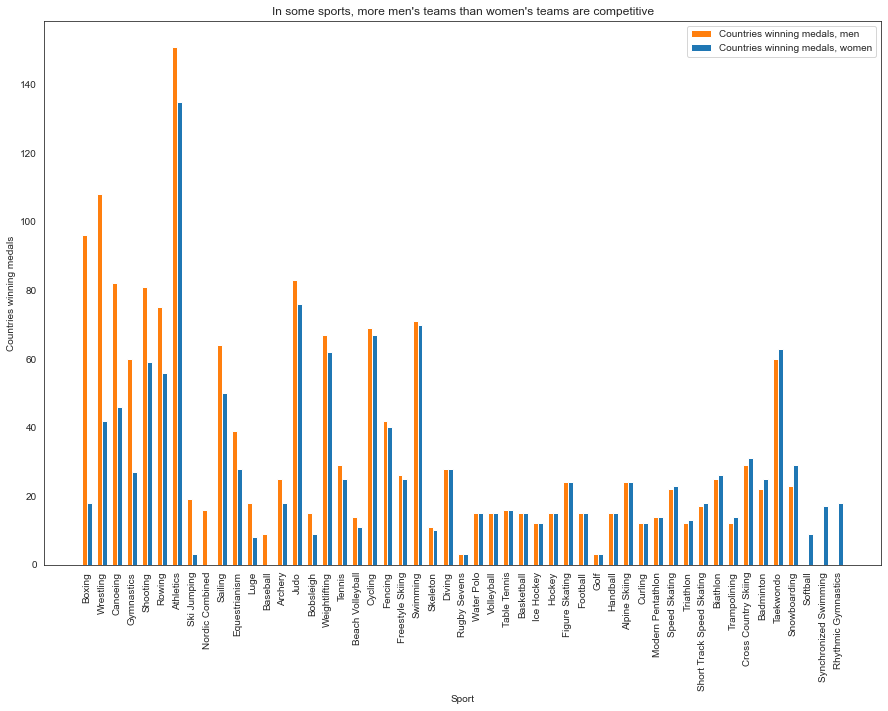

In [83]:
fig, ax=plt.subplots()

x= np.arange(len(country_count_by_sport_since_2000.index)) 
width=0.33

# create x points for bars


M = ax.bar(x=x, height=country_count_by_sport_since_2000['M'], width=width, color='C1', label="Countries winning medals, men")
F = ax.bar(x=x + width, height=country_count_by_sport_since_2000['F'], width=width, color='C0', label="Countries winning medals, women")

# graph M and F country counts at x and x+width (to pair bars)



plt.xticks(x + width / 2, rotation='vertical')
ax.set_xticklabels(country_count_by_sport_since_2000.index)

# set x ticks and label them with sport names


plt.ylabel('Countries winning medals')
plt.xlabel('Sport')

plt.legend()

plt.title("In some sports, more men's teams than women's teams are competitive")

plt.show()

It is apparent that many sports have considerably more medal-winning men's than women's teams. 

Some of the sports where men dominate - boxing, wrestiling, canoeing - are sports that have awarded fewer medals to women. For instance, boxing only allowed women to compete beginning in 2012 and canoeing had more men's than women's events. So women being blocked from competition explains why fewer countries could win medals in these sports.

In gymnastics, women compete in 6 medal events while men compete in 8. This gap should explain roughly half the gap in the number of countries represented; the other half of the discrepency can be evidence that more countries send competitive male gymnasts to the Olympics, while only a few countries dominate women's gymnastics.

_Let's highlight those missing medals for and women and women's teams with outline bars around the gap_

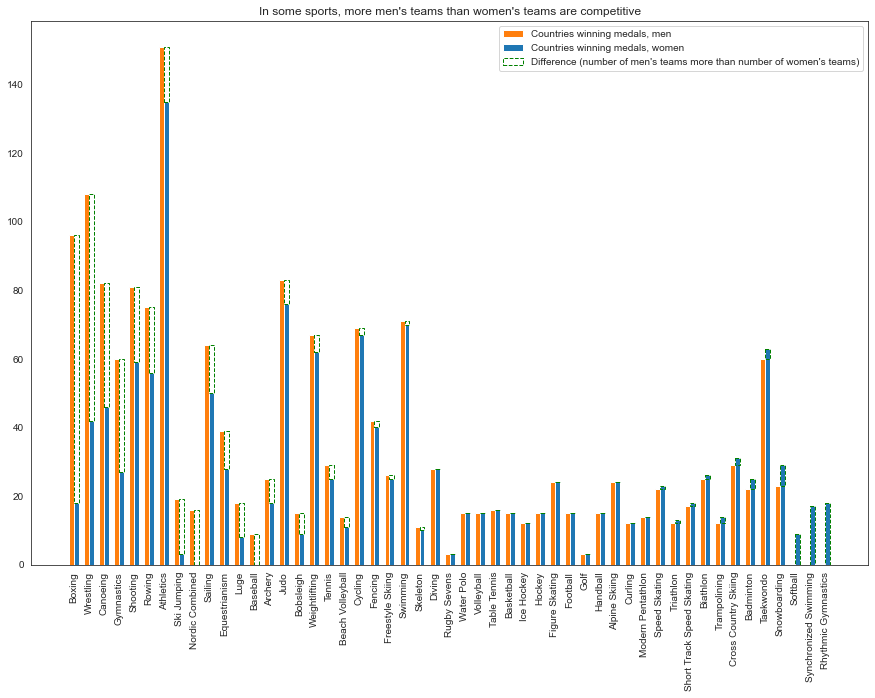

In [84]:
fig, ax=plt.subplots()

x= np.arange(len(country_count_by_sport_since_2000.index)) 
width=0.33

# create x points for bars


M = ax.bar(x=x, height=country_count_by_sport_since_2000['M'], width=width, color='C1', label="Countries winning medals, men")
F = ax.bar(x=x + width, height=country_count_by_sport_since_2000['F'], width=width, color='C0', label="Countries winning medals, women")

# graph M and F country counts at x and x+width (to pair bars)


diff = plt.bar(x=x + width, height=country_count_by_sport_since_2000['diff'], width=width, bottom=country_count_by_sport_since_2000['F'], color='None', edgecolor='g', linestyle='--', label="Difference (number of men's teams more than number of women's teams)")

# plot difference on top of F bar - to visualize 'missing' women athletes/women's teams


plt.xticks(x + width / 2, rotation='vertical')
ax.set_xticklabels(country_count_by_sport_since_2000.index)

# set x ticks and label them with sport names


plt.legend()

plt.title("In some sports, more men's teams than women's teams are competitive")

plt.show()

### Is the portion of medals won by female athletes correlated to a country's overall gender equality?

load in Gender Inequality Index data 

The [Gender Inequality Index (GII)](http://hdr.undp.org/en/content/gender-inequality-index-gii) is prepared by the UN Development Programme. It is based on comparisons of men's and women's health, empowerment, and economic status. Specifically, it combines measures including maternal mortality, teen birth rates, portion of seats in national legislatures held by women, education level attainment, and employment. The metrics are collected from [several](http://hdr.undp.org/en/faq-page/gender-inequality-index-gii#t294n2916) other international organizations, including the World Health Organization, World Bank, UNESCO, International Parliamentary Union, and International Labour Organization (ILO). 


_The data are available for download as a formatted (but cumbersome) excel file. in Excel I deleted all but the 'country' and 'value' columns, deleted the 'HIGH HUMAN DEVELOPMENT' etc. headers, then saved that as a csv.

In [85]:
gii = pd.read_csv('2020_statistical_annex_table_5.csv')

In [86]:
gii

,Country,Value
0,Norway,0.045
1,Ireland,0.093
2,Switzerland,0.025
3,"Hong Kong, China (SAR)",..
4,Iceland,0.058
...,...,...
190,Monaco,..
191,Nauru,..
192,San Marino,..
193,Somalia,..


_I will reuse the NOC code/country name file I used up top._

_I found the list on [Wikipedia](https://en.wikipedia.org/wiki/List_of_IOC_country_codes) of NOC codes and corresponding Olympic Committee names. I copied this into Excel, cleaned it up, and saved it as a csv_

_let's check what names will not match_

In [87]:
NOC_codes.loc[~NOC_codes['Country name'].isin(gii['Country'])]

,NOC,Country name
8,ARU,Aruba
9,ASA,American Samoa
19,BER,Bermuda
24,BOL,Bolivia
28,BRU,Brunei
34,CAY,Cayman Islands
35,CGO,Republic of the Congo
39,CIV,Ivory Coast
41,COD,Democratic Republic of the Congo
42,COK,Cook Islands


In [88]:
gii.loc[~gii['Country'].isin(NOC_codes['Country name'])]

,Country,Value
3,"Hong Kong, China (SAR)",..
12,United Kingdom,0.118
22,Korea (Republic of),0.064
26,Czechia,0.136
46,Brunei Darussalam,0.255
51,Russian Federation,0.225
70,Iran (Islamic Republic of),0.459
89,Moldova (Republic of),0.204
106,Bolivia (Plurinational State of),0.417
112,Venezuela (Bolivarian Republic of),0.479


_let's make a dict to manually edit the names that don't match_

_print the not-matching gountry names from the GII list; copy that into a new dict; find the matching countries from the NOC codes list and assign them in the dict_

_I should caveat that I make no claim about the correct or proper names of these countries or territories. For this analysis of Olympic performance, I use the names recognized at the Olympics_

In [89]:
gii.loc[~gii['Country'].isin(NOC_codes['Country name'])]['Country'].to_list() # find the gii country names that are not (~) in the NOC country names column. print as list

['Hong Kong, China (SAR)',
 'United Kingdom',
 'Korea (Republic of)',
 'Czechia',
 'Brunei Darussalam',
 'Russian Federation',
 'Iran (Islamic Republic of)',
 'Moldova (Republic of)',
 'Bolivia (Plurinational State of)',
 'Venezuela (Bolivarian Republic of)',
 'Palestine, State of',
 'Viet Nam',
 'Cabo Verde',
 'Sao Tome and Principe',
 'Micronesia (Federated States of)',
 "Lao People's Democratic Republic",
 'Eswatini (Kingdom of)',
 'Timor-Leste',
 'Congo',
 'Syrian Arab Republic',
 "Côte d'Ivoire",
 'Tanzania (United Republic of)',
 'Gambia',
 'Congo (Democratic Republic of the)',
 "Korea (Democratic People's Rep. of)"]

In [90]:
country_name_substitutions = {'Hong Kong, China (SAR)':'Hong Kong, China',
 'United Kingdom':'Great Britain',
 'Korea (Republic of)':'South Korea',
 'Czechia':'Czech Republic',
 'Brunei Darussalam':'Brunei',
 'Russian Federation':'Russia',
 'Iran (Islamic Republic of)':'Iran',
 'North Macedonia': 'North Macedonia',
 'Moldova (Republic of)':'Moldova',
 'Bolivia (Plurinational State of)':'Bolivia',
 'Venezuela (Bolivarian Republic of)':'Venezuela',
 'Palestine, State of':'Palestine',
 'Viet Nam':'Vietnam',
 'Cabo Verde':'Cape Verde',
 'Sao Tome and Principe':"São Tomé and Príncipe",
 'Micronesia (Federated States of)':'Federated States of Micronesia',
 "Lao People's Democratic Republic":'Laos',
 'Eswatini (Kingdom of)':'Eswatini',
 'Timor-Leste':'East Timor',
 'Congo':'Republic of the Congo',
 'Syrian Arab Republic':'Syria',
 "Côte d'Ivoire":'Ivory Coast',
 'Tanzania (United Republic of)':'Tanzania',
 'Gambia':'The Gambia',
 'Congo (Democratic Republic of the)':'Democratic Republic of the Congo',
 "Korea (Democratic People's Rep. of)":'North Korea'}

# manually look through the NOC country name list and fill in the matching country names

In [91]:
gii['Country'].replace(to_replace=country_name_substitutions, inplace=True) # replace names using the dict

In [92]:
gii = gii.merge(NOC_codes, left_on='Country', right_on='Country name').drop('Country name', axis=1)

# merge NOC codes into gii data

In [93]:
gii['Value'] = pd.to_numeric(gii['Value'], errors='coerce') # convert gii to numeric value (or NaN)

In [94]:
gii

,Country,Value,NOC
0,Norway,0.045,NOR
1,Ireland,0.093,IRL
2,Switzerland,0.025,SUI
3,"Hong Kong, China",NaN,HKG
4,Iceland,0.058,ISL
...,...,...,...
190,Monaco,NaN,MON
191,Nauru,NaN,NRU
192,San Marino,NaN,SMR
193,Somalia,NaN,SOM


#### join Gender Inequality Index to Olympian data

- Filter medals count to games since 2000 (to avoid the trickiness and dubious value of matching current GII to no-longer-existent countries.
- Join GII to medals counts using country names as the match field
    - (might need to do some manual name-editing to get all names to match)
    

In [95]:
pct_f_since_2000 = pct_f_since_2000.merge(gii.set_index('NOC'), on='NOC').rename(columns={'Value':'GII'})

# merge gii data into percent of medals won by women data by matching NOC codes; rename gii column

In [96]:
pct_f_since_2000

,F,M,total medals,pct_F,Country,GII
NOC,,,,,,
AFG,0.0,2.0,2.0,0.000000,Afghanistan,0.655
ALG,2.0,8.0,10.0,0.200000,Algeria,0.429
ARG,11.0,17.0,28.0,0.392857,Argentina,0.328
ARM,1.0,17.0,18.0,0.055556,Armenia,0.245
AUS,130.0,145.0,275.0,0.472727,Australia,0.097
...,...,...,...,...,...,...
USA,385.0,403.0,788.0,0.488579,United States,0.204
UZB,1.0,35.0,36.0,0.027778,Uzbekistan,0.288
VEN,5.0,6.0,11.0,0.454545,Venezuela,0.479


#### visulaize the relationship between competitive women athletes and overall gender equality

Scatter plot with x = gender equality, y = percent of medals won by women.

Look for correlation. Try to fit a line.

I hypothesize some positive correlation where the greater the gender equality index, the higher the portion of medals won by women

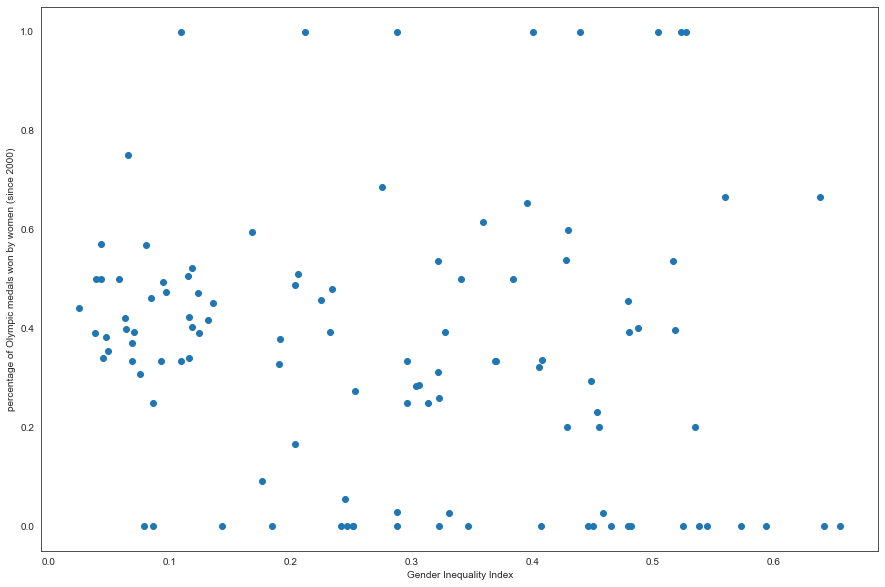

In [97]:
plt.scatter(pct_f_since_2000['GII'], pct_f_since_2000['pct_F'])

plt.xlabel('Gender Inequality Index')
plt.ylabel('percentage of Olympic medals won by women (since 2000)')

plt.show()

_huh but it sort of looks like nothing_

_let's fit a line to it_

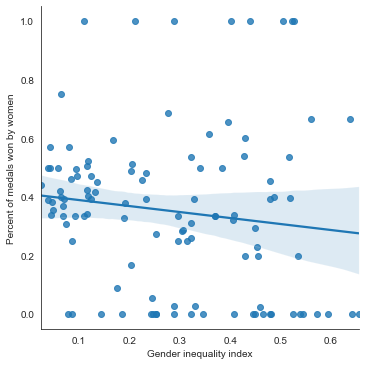

In [98]:
sns.lmplot(data=pct_f_since_2000, x='GII', y='pct_F',)

plt.ylabel('Percent of medals won by women')
plt.xlabel('Gender inequality index')

plt.show()


This shows a slight relationship, where the greater inequality in society corresponds with a slightly lower percent of medals won by women. But the relationship is small and the uncertainty large.

_let's look at scaling by total medals won and checking out some stand-out countries_

In [99]:
pct_f_since_2000[['total medals']].describe() # check the distribution of medals - to pick over what threshold to label

,total medals
count,119.000000
mean,59.369748
std,117.798008
min,1.000000
25%,3.000000
50%,13.000000
75%,52.500000
max,788.000000


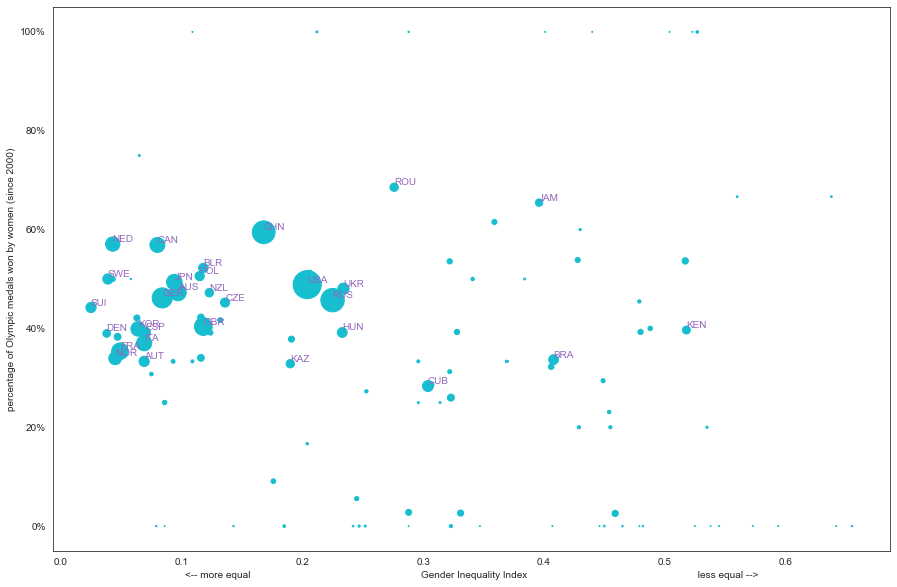

In [100]:
fig,ax=plt.subplots()

ax.scatter(pct_f_since_2000['GII'], pct_f_since_2000['pct_F'], c='C9', s=pct_f_since_2000['total medals'])

plt.xlabel('<-- more equal                                                              Gender Inequality Index                                                              less equal -->')
plt.ylabel('percentage of Olympic medals won by women (since 2000)')

ax.yaxis.set_major_formatter('{x:.0%}') # reformat X axis as percentage


for c in pct_f_since_2000.loc[pct_f_since_2000['total medals'] > 50].index: # create a filter for labelling only countries with 100+ medals (approx. more than average)
    plt.annotate(c, (pct_f_since_2000.loc[c,'GII'],pct_f_since_2000.loc[c,'pct_F']), c='C4', ha='left', va='bottom') # annotate 
plt.show()

Here it is the outliers that may be most interesting: 
- Austia is quite gender-equal but men win about twice as many medals. 
    - Canada has similar gender equality to Austria but its medal ratio is almost flipped.
- Romania and Jamiaca have almost the highest percentage of medals won by women but are quite unequal overall.
- Kenya's society is much more unequal that nearly all others shown but its men and women win roughly equal numbers of medals.
- China's women's team again stand out: China's women's team is more dominant than its overall gender parity would suggest.
    - The same is true of the U.S.

Each of these could be a case study for further inquiry.

## 🥇 Analysis

If some countries are backing stronger men's teams than women's, that suggests potentially great women athletes who are missing from Olympic competition. 

Women from countries that _do_ have comparatively strong support for women's sports may face less competition for top medals. But women who could be star athletes may not make it to the Olympics or to an elite performance  level if they live in countries without cultural and financial support for women's sports. 

In the U.S., support for women's athletics has [grown](https://www.womenssportsfoundation.org/education/title-ix-and-the-rise-of-female-athletes-in-america/) [tremendously](https://www.weforum.org/agenda/2016/08/sustaining-the-olympic-legacy-women-sports-and-public-policy/) since Title IX, enacted in 1972, required college athletic programs to equally fund women's sports. U.S. college programs [draw athletes]((https://www.washingtonpost.com/sports/2019/06/18/womens-world-cup-rosters-global-impact-title-ix-is-clear/)) from around the world, though at the Olympics these women frequently represent their home countries. 

Title IX's requirements are still uncommon; few countries mandate equal funding for women's sports. By adopting such policies, countries would be able to identify and support women athletes who could become global superstars. Boosting support for women athletes would bring more great competitors to the Olympics and allow women access in more equal societies. 

Overall, this analysis suggest that specific support for women athletes and women's sports is key to fielding competitive female teams. Overall societal gender equality does not alone ensure women athletes have support to win Olympic medals. The countries whose women's teams dominate - the U.S. and China - each have specific programs and policies in place to provide funding specifically to women athletes. Those policies may be what allow them to so dominate the international field. 